# 1. Import lib

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

pd.set_option("display.float_format", "{:.1f}".format)

## Add data


In [48]:
df = pd.read_csv('movies_data_processed.csv')
df

name  \
0                      Attack on Titan   
1                           Love Hurts   
2               The Quick and the Dead   
3                        The Equalizer   
4                           Goosebumps   
...                                ...   
7989                             Chuka   
7990                        Unforgiven   
7991                          The Duel   
7992                     Calamity Jane   
7993  Spirit: Stallion of the Cimarron   

                                                 genres       type  rating  \
0     Action Epic, Adult Animation, Anime, Sh≈çnen, S...  TV Series     9.1   
1                          Martial Arts, Action, Comedy      Movie     5.3   
2             Action, Drama, Romance, Thriller, Western      Movie     6.5   
3     Cop Drama, Police Procedural, Action, Crime, D...  TV Series     5.6   
4     Teen Horror, Action, Adventure, Comedy, Drama,...  TV Series     6.7   
...                                                 ...        ...     ...   
7989                                            Western      Movie     6.3   
7990              Period Drama, Tragedy, Drama, Western      Movie     8.2   
7991                                     Drama, Western      Movie     5.8   
7992         Classic Musical, Musical, Romance, Western      Movie     7.2   
7993  Animal Adventure, Hand-Drawn Animation, Advent...      Movie     7.2   

      no_of_votes  meta_score  release_date       gross     budget  \
0        591000.0         NaN        2013.0         NaN        NaN   
1          6800.0        34.0        2025.0  17235040.0 18000000.0   
2        107000.0        49.0        1995.0  18636537.0 32000000.0   
3         19000.0         NaN        2021.0         NaN        NaN   
4         15000.0         NaN        2023.0         NaN        NaN   
...           ...         ...           ...         ...        ...   
7989       1100.0         NaN        1967.0         NaN        NaN   
7990     451000.0        85.0        1992.0 159167799.0 14400000.0   
7991      12000.0        42.0        2016.0     20672.0 10000000.0   
7992      11000.0        74.0        1953.0      7150.0        NaN   
7993      90000.0        52.0        2002.0 122563539.0 80000000.0   

                          countries  \
0                             Japan   
1                     United States   
2              United States, Japan   
3                     United States   
4     United States, Canada, France   
...                             ...   
7989                  United States   
7990                  United States   
7991                  United States   
7992                  United States   
7993          United States, Canada   

                                                    url  ROI   result  
0     https://www.imdb.com/title/tt2560140/?ref_=sr_...  NaN  Success  
1     https://www.imdb.com/title/tt30788842/?ref_=sr... -0.0     Fail  
2     https://www.imdb.com/title/tt0114214/?ref_=sr_... -0.4  Success  
3     https://www.imdb.com/title/tt11242246/?ref_=sr...  NaN     Fail  
4     https://www.imdb.com/title/tt17720272/?ref_=sr...  NaN     Fail  
...                                                 ...  ...      ...  
7989  https://www.imdb.com/title/tt0061477/?ref_=sr_...  NaN     Fail  
7990  https://www.imdb.com/title/tt0105695/?ref_=sr_t_3 10.1  Success  
7991  https://www.imdb.com/title/tt2436682/?ref_=sr_... -1.0     Fail  
7992  https://www.imdb.com/title/tt0045591/?ref_=sr_...  NaN  Success  
7993  https://www.imdb.com/title/tt0166813/?ref_=sr_...  0.5  Success  

[7994 rows x 13 columns]

In [49]:
df = df[df['release_date'] < 2025]

# 2. Ph√¢n t√≠ch data theo th·ªÉ lo·∫°i TV series v√† movies (Ph·∫ßn 4)

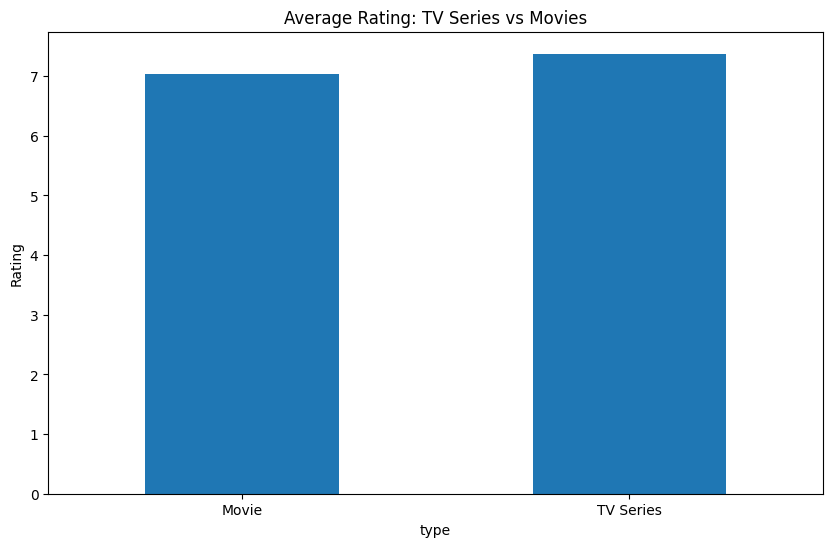


Average ratings:
type
Movie       7.0
TV Series   7.4
Name: rating, dtype: float64


In [28]:
# So s√°nh rating trung b√¨nh gi·ªØa TV Series v√† Movies
avg_ratings = df.groupby('type')['rating'].mean()
plt.figure(figsize=(10,6))
avg_ratings.plot(kind='bar')
plt.title('Average Rating: TV Series vs Movies')
plt.ylabel('Rating')
plt.xticks(rotation=0)
plt.show()

print("\nAverage ratings:")
print(avg_ratings)


Rating trung b√¨nh 2 lo·∫°i phim x·∫•p x·ªâ nhau

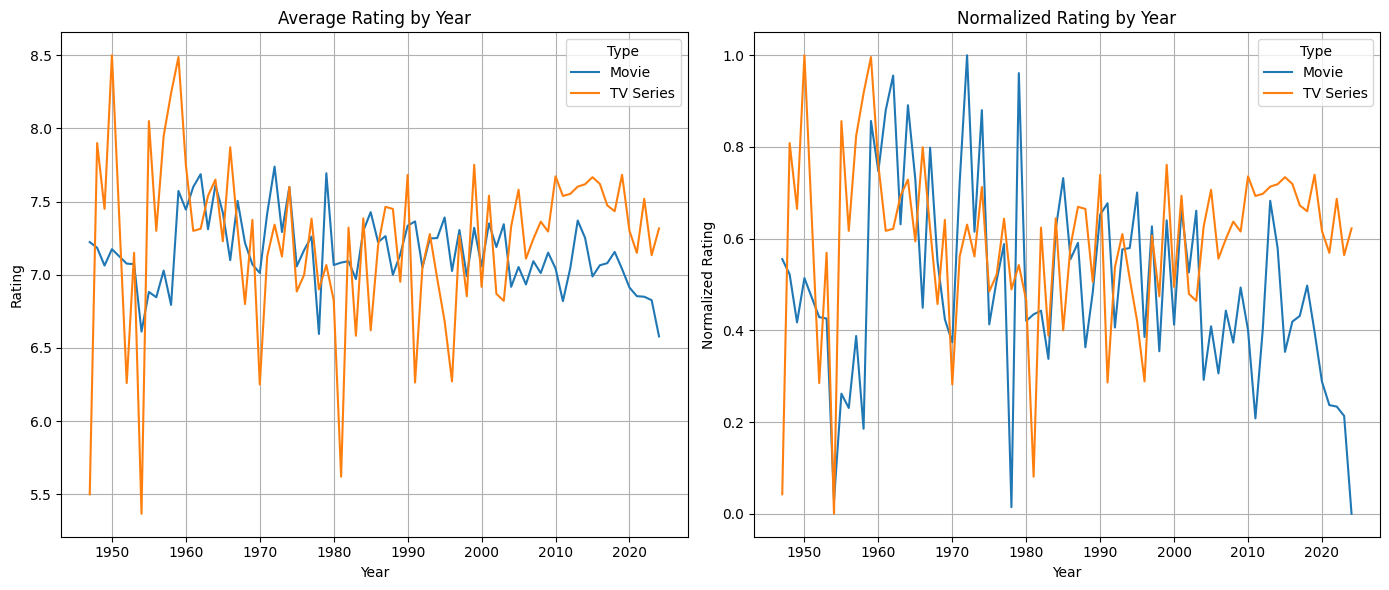


Yearly average ratings:
type          Movie  TV Series
release_date                  
1947.0          7.2        5.5
1948.0          7.2        7.9
1949.0          7.1        7.5
1950.0          7.2        8.5
1952.0          7.1        6.3
...             ...        ...
2020.0          6.9        7.3
2021.0          6.9        7.1
2022.0          6.8        7.5
2023.0          6.8        7.1
2024.0          6.6        7.3

[77 rows x 2 columns]

Normalized yearly ratings:
type          Movie  TV Series
release_date                  
1947.0          0.6        0.0
1948.0          0.5        0.8
1949.0          0.4        0.7
1950.0          0.5        1.0
1952.0          0.4        0.3
...             ...        ...
2020.0          0.3        0.6
2021.0          0.2        0.6
2022.0          0.2        0.7
2023.0          0.2        0.6
2024.0          0.0        0.6

[77 rows x 2 columns]


In [29]:
# T√≠nh rating trung b√¨nh theo nƒÉm v√† type
yearly_ratings = df.groupby(['release_date', 'type'])['rating'].mean().unstack()
yearly_ratings = yearly_ratings.dropna()

# Chu·∫©n h√≥a d·ªØ li·ªáu
scaler = MinMaxScaler()
normalized_ratings = pd.DataFrame(scaler.fit_transform(yearly_ratings), 
                                  columns=yearly_ratings.columns, 
                                  index=yearly_ratings.index)

# V·∫Ω bi·ªÉu ƒë·ªì line
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bi·ªÉu ƒë·ªì g·ªëc
yearly_ratings.plot(ax=axes[0], kind='line')
axes[0].set_title('Average Rating by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Rating')
axes[0].legend(title='Type')
axes[0].grid(True)

# Bi·ªÉu ƒë·ªì chu·∫©n h√≥a
normalized_ratings.plot(ax=axes[1], kind='line')
axes[1].set_title('Normalized Rating by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Normalized Rating')
axes[1].legend(title='Type')
axes[1].grid(True)

plt.tight_layout()
plt.show()

print("\nYearly average ratings:")
print(yearly_ratings)

print("\nNormalized yearly ratings:")
print(normalized_ratings)

### 1. Bi·ªÉu ƒë·ªì tr√°i: "Average Rating by Year"
üîπ Nh·∫≠n x√©t chung:

- Phim truy·ªÅn h√¨nh (ƒë∆∞·ªùng m√†u cam) c√≥ s·ª± bi·∫øn ƒë·ªông l·ªõn h∆°n so v·ªõi phim ƒëi·ªán ·∫£nh (ƒë∆∞·ªùng m√†u xanh).
- Tr∆∞·ªõc nƒÉm 1980, TV Series c√≥ s·ª± dao ƒë·ªông m·∫°nh, c√≥ th·ªùi ƒëi·ªÉm ƒë·∫°t ƒëi·ªÉm trung b√¨nh tr√™n 8.5, nh∆∞ng c≈©ng c√≥ giai ƒëo·∫°n gi·∫£m xu·ªëng d∆∞·ªõi 5.5.
- T·ª´ kho·∫£ng nƒÉm 2000 tr·ªü ƒëi, ƒëi·ªÉm s·ªë c·ªßa TV Series c√≥ xu h∆∞·ªõng ·ªïn ƒë·ªãnh h∆°n, duy tr√¨ quanh m·ª©c 7.5 - 8.0.
- Phim ƒëi·ªán ·∫£nh c√≥ xu h∆∞·ªõng ·ªïn ƒë·ªãnh h∆°n trong su·ªët th·ªùi gian d√†i, dao ƒë·ªông ch·ªß y·∫øu t·ª´ 6.5 ƒë·∫øn 7.5.
- Sau nƒÉm 2015, ƒëi·ªÉm ƒë√°nh gi√° c·ªßa phim ƒëi·ªán ·∫£nh c√≥ xu h∆∞·ªõng gi·∫£m nh·∫π, trong khi TV Series v·∫´n duy tr√¨ m·ª©c cao.

### 2. Bi·ªÉu ƒë·ªì ph·∫£i: "Normalized Rating by Year"
üîπ Nh·∫≠n x√©t chung:

- D·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c chu·∫©n h√≥a v·ªÅ c√πng m·ªôt thang ƒëo, gi√∫p so s√°nh d·ªÖ d√†ng h∆°n.
- Phim truy·ªÅn h√¨nh tr∆∞·ªõc nƒÉm 1960 c√≥ s·ª± dao ƒë·ªông r·∫•t l·ªõn (th·ªÉ hi·ªán qua c√°c ƒë·ªânh cao v√† ƒë√°y s√¢u).
- Sau nƒÉm 2000, m·ª©c ƒë·ªô dao ƒë·ªông gi·ªØa Movie & TV Series thu h·∫πp l·∫°i, nh∆∞ng phim truy·ªÅn h√¨nh v·∫´n c√≥ xu h∆∞·ªõng gi·ªØ ƒëi·ªÉm cao h∆°n.
- Phim ƒëi·ªán ·∫£nh g·∫ßn ƒë√¢y c√≥ xu h∆∞·ªõng gi·∫£m ƒëi·ªÉm ƒë√°ng k·ªÉ (c√≥ th·ªÉ do s·ª± thay ƒë·ªïi th·ªã hi·∫øu, s·ª± b√£o h√≤a n·ªôi dung, ho·∫∑c do ƒë√°nh gi√° ng√†y c√†ng kh·∫Øt khe h∆°n t·ª´ kh√°n gi·∫£).

### 3. S·ª± kh√°c bi·ªát d·ªØ li·ªáu sau khi chu·∫©n h√≥a
üî∏ Tr∆∞·ªõc chu·∫©n h√≥a (bi·ªÉu ƒë·ªì tr√°i):

- Bi·ªÉu ƒë·ªì hi·ªÉn th·ªã gi√° tr·ªã th·ª±c c·ªßa ƒëi·ªÉm ƒë√°nh gi√°, c√≥ √Ω nghƒ©a tr·ª±c ti·∫øp v·ªõi ng∆∞·ªùi xem.
- Tuy nhi√™n, do s·ª± kh√°c bi·ªát v·ªÅ quy m√¥ v√† bi√™n ƒë·ªô dao ƒë·ªông gi·ªØa hai lo·∫°i phim, c√≥ th·ªÉ kh√≥ so s√°nh ch√≠nh x√°c.

üî∏ Sau chu·∫©n h√≥a (bi·ªÉu ƒë·ªì ph·∫£i):

- Gi√∫p th·ªÉ hi·ªán r√µ h∆°n xu h∆∞·ªõng thay ƒë·ªïi theo th·ªùi gian.
- C√°c kho·∫£ng bi·∫øn ƒë·ªông m·∫°nh tr∆∞·ªõc 1980 c·ªßa Movies ƒë∆∞·ª£c th·ªÉ hi·ªán r√µ h∆°n.
- M·ª©c ƒë·ªô s·ª•t gi·∫£m c·ªßa phim ƒëi·ªán ·∫£nh t·ª´ 2015 tr·ªü ƒëi c≈©ng n·ªïi b·∫≠t h∆°n.


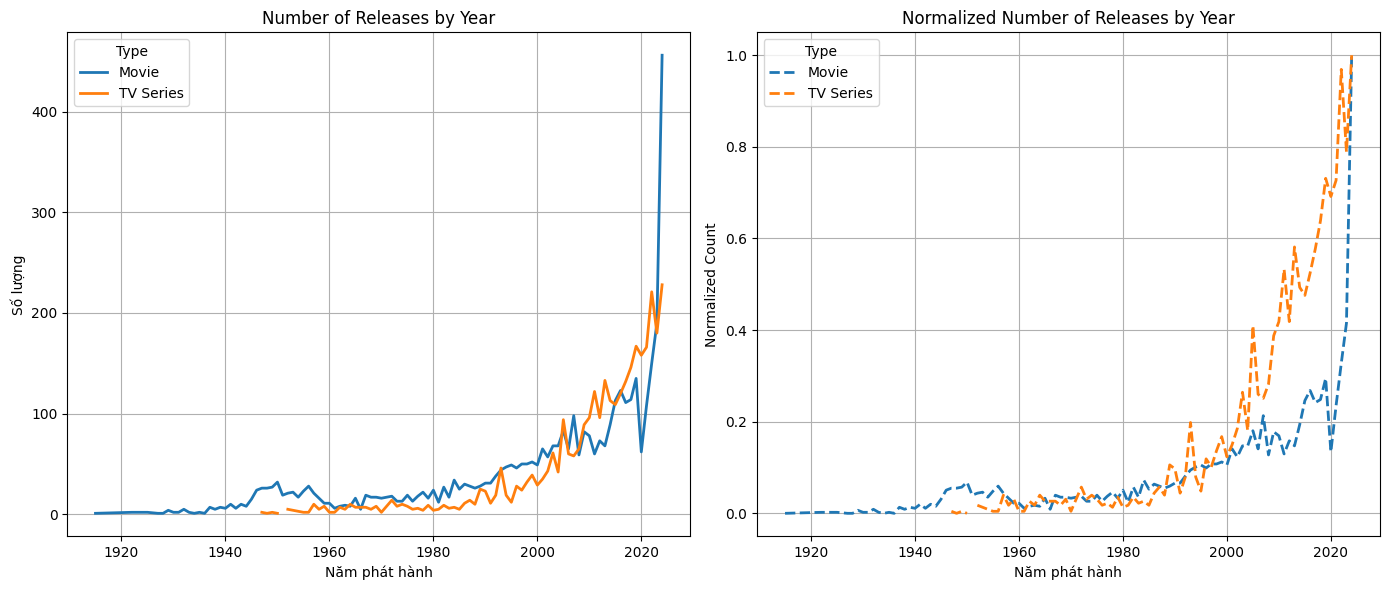

In [30]:
# Nh√≥m d·ªØ li·ªáu theo nƒÉm v√† lo·∫°i
yearly_counts = df.groupby(['release_date', 'type']).size().unstack()

# Chu·∫©n h√≥a d·ªØ li·ªáu
scaler = MinMaxScaler()
normalized_counts = pd.DataFrame(scaler.fit_transform(yearly_counts), 
                                 columns=yearly_counts.columns, 
                                 index=yearly_counts.index)

# V·∫Ω bi·ªÉu ƒë·ªì g·ªëc v√† bi·ªÉu ƒë·ªì chu·∫©n h√≥a
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bi·ªÉu ƒë·ªì s·ªë l∆∞·ª£ng g·ªëc
yearly_counts.plot(ax=axes[0], kind='line', linewidth=2, markersize=2)
axes[0].set_title('Number of Releases by Year')
axes[0].set_xlabel('NƒÉm ph√°t h√†nh')
axes[0].set_ylabel('S·ªë l∆∞·ª£ng')
axes[0].legend(title='Type')
axes[0].grid(True)

# Bi·ªÉu ƒë·ªì chu·∫©n h√≥a
normalized_counts.plot(ax=axes[1], kind='line', linestyle='dashed', linewidth=2, markersize=2)
axes[1].set_title('Normalized Number of Releases by Year')
axes[1].set_xlabel('NƒÉm ph√°t h√†nh')
axes[1].set_ylabel('Normalized Count')
axes[1].legend(title='Type')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Nh·∫≠n x√©t bi·ªÉu ƒë·ªì xu h∆∞·ªõng ph√°t tri·ªÉn t·ª´ng lo·∫°i phimp
### 1. Tr∆∞·ªõc chu·∫©n h√≥a
S·ªë l∆∞·ª£ng th·ª±c t·∫ø:

- Tr·ª•c Y th·ªÉ hi·ªán s·ªë l∆∞·ª£ng phim v√† TV Series ph√°t h√†nh h√†ng nƒÉm.
- Xu h∆∞·ªõng tƒÉng m·∫°nh t·ª´ kho·∫£ng nƒÉm 2000 tr·ªü ƒëi, ƒë·∫∑c bi·ªát l√† sau 2010.
- Phim ƒëi·ªán ·∫£nh (Movie) tƒÉng ƒë·ªôt bi·∫øn sau 2020, trong khi TV Series c≈©ng tƒÉng ƒë√°ng k·ªÉ nh∆∞ng c√≥ xu h∆∞·ªõng ·ªïn ƒë·ªãnh h∆°n.
- Tr∆∞·ªõc 1950, s·ªë l∆∞·ª£ng s·∫£n ph·∫©m ph√°t h√†nh r·∫•t th·∫•p.
### 2. Sau chu·∫©n h√≥a 
D·ªØ li·ªáu chu·∫©n h√≥a (ƒë∆∞a v·ªÅ kho·∫£ng 0 - 1):

- Bi·ªÉu ƒë·ªì gi√∫p so s√°nh t·ªëc ƒë·ªô tƒÉng tr∆∞·ªüng c·ªßa hai lo·∫°i h√¨nh phim m√† kh√¥ng b·ªã ·∫£nh h∆∞·ªüng b·ªüi quy m√¥ tuy·ªát ƒë·ªëi.
- Giai ƒëo·∫°n tr∆∞·ªõc 1980, s·ªë l∆∞·ª£ng Movie v√† TV Series g·∫ßn nh∆∞ t∆∞∆°ng ƒë∆∞∆°ng.
- T·ª´ 1990 tr·ªü ƒëi, TV Series c√≥ t·ªëc ƒë·ªô tƒÉng nhanh h∆°n, th·ªÉ hi·ªán r√µ r√†ng trong ƒë∆∞·ªùng n√©t ƒë·ª©t m√†u cam.
- Sau 2010, c·∫£ hai lo·∫°i h√¨nh phim ƒë·ªÅu c√≥ s·ª± tƒÉng tr∆∞·ªüng ƒë·ªôt bi·∫øn.
- Phim ƒëi·ªán ·∫£nh c√≥ s·ª± tƒÉng m·∫°nh sau 2020 (t·ª´ gi√° tr·ªã g·∫ßn 0.4 l√™n g·∫ßn 1), trong khi TV Series c≈©ng tƒÉng nh∆∞ng ch·∫≠m h∆°n.
### 3. S·ª± kh√°c bi·ªát gi·ªØa hai bi·ªÉu ƒë·ªì
üî∏ Tr∆∞·ªõc chu·∫©n h√≥a (bi·ªÉu ƒë·ªì tr√°i):

- Th·ªÉ hi·ªán r√µ s·ªë l∆∞·ª£ng th·ª±c t·∫ø, gi√∫p th·∫•y ƒë∆∞·ª£c quy m√¥ s·∫£n xu·∫•t qua t·ª´ng nƒÉm.
- Tuy nhi√™n, do ch√™nh l·ªách s·ªë l∆∞·ª£ng l·ªõn, kh√≥ nh·∫≠n ra t·ªëc ƒë·ªô tƒÉng tr∆∞·ªüng c·ªßa t·ª´ng lo·∫°i.

üî∏ Sau chu·∫©n h√≥a (bi·ªÉu ƒë·ªì ph·∫£i):

- Gi√∫p so s√°nh s·ª± tƒÉng tr∆∞·ªüng t∆∞∆°ng ƒë·ªëi, d·ªÖ d√†ng th·∫•y TV Series c√≥ t·ªëc ƒë·ªô tƒÉng m·∫°nh h∆°n tr∆∞·ªõc nƒÉm 2020, nh∆∞ng sau ƒë√≥ phim ƒëi·ªán ·∫£nh l·∫°i c√≥ c√∫ b·ª©t ph√° l·ªõn.
- S·ª± gia tƒÉng m·∫°nh c·ªßa TV Series t·ª´ kho·∫£ng nƒÉm 2000 tr·ªü ƒëi ƒë∆∞·ª£c th·ªÉ hi·ªán r√µ h∆°n.
- Bi·ªÉu ƒë·ªì sau khi chu·∫©n h√≥a ph√π h·ª£p ƒë·ªÉ th·ªÉ hi·ªán xu h∆∞·ªõng ph√°t tri·ªÉn trong khi bi·ªÉu ƒë·ªì tr∆∞·ªõc khi chu·∫©n h√≥a ph√π h·ª£p v·ªõi th·ªÉ hi·ªán quy m√¥ th·ª±c t·∫ø.

### D·ª± do√°n:
- S√¥ l∆∞·ª£ng movies ƒëang tƒÉng m·∫°nh h∆°n TV series v√† s·∫Ω ti·∫øp t·ª•c t·∫±ng nh∆∞ v·∫≠y.


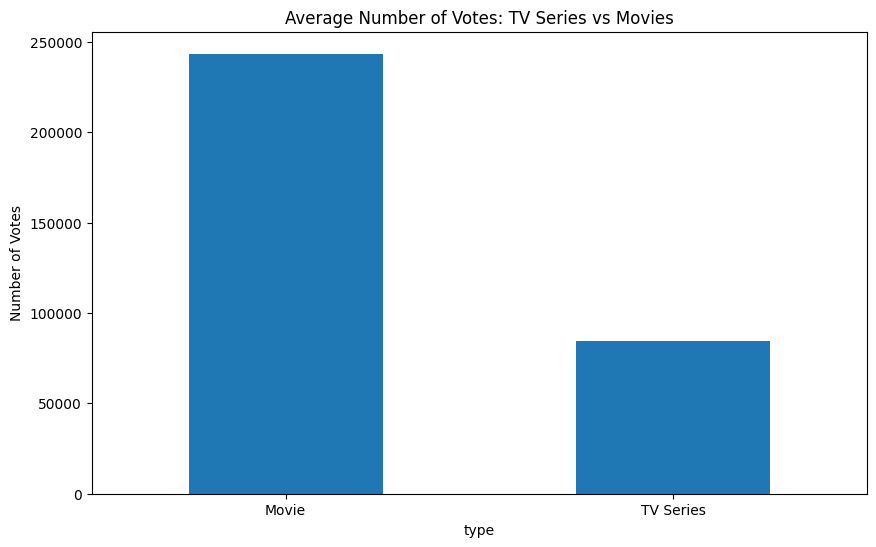


Average number of votes:
type
Movie       243469.7
TV Series    84288.9
Name: no_of_votes, dtype: float64


In [31]:
# So s√°nh s·ªë l∆∞·ª£ng vote trung b√¨nh
avg_votes = df.groupby('type')['no_of_votes'].mean()
plt.figure(figsize=(10,6))
avg_votes.plot(kind='bar')
plt.title('Average Number of Votes: TV Series vs Movies')
plt.ylabel('Number of Votes')
plt.xticks(rotation=0)
plt.show()

print("\nAverage number of votes:")
print(avg_votes)

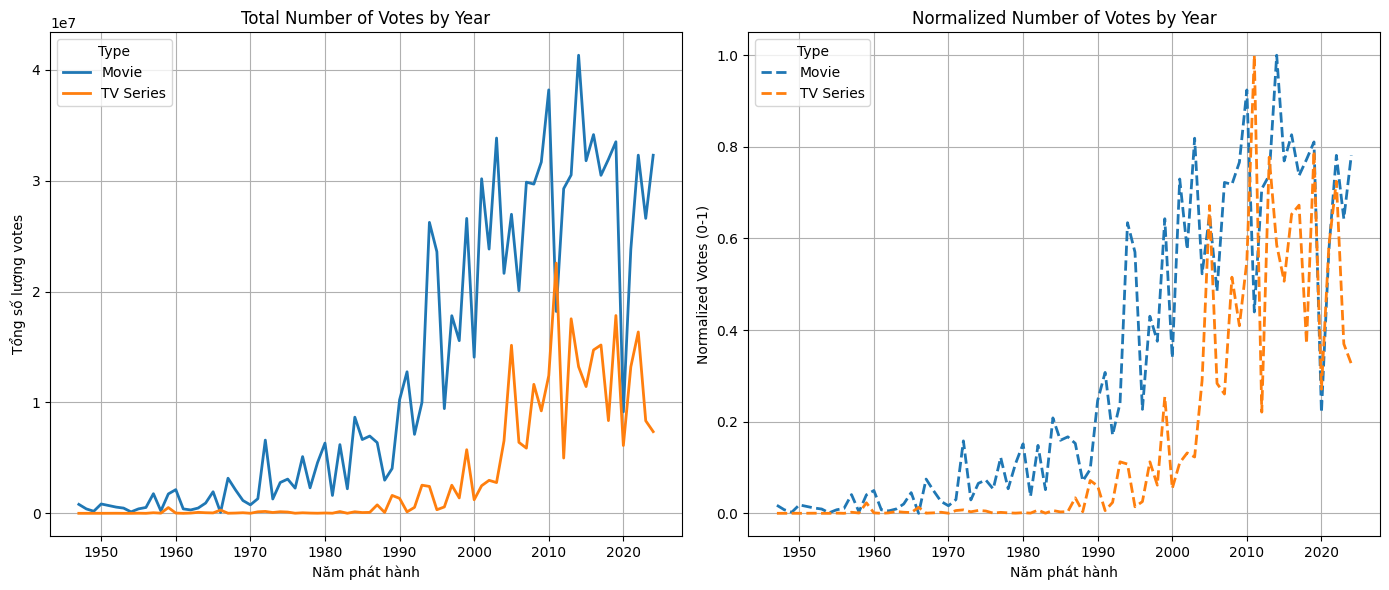

In [32]:
# Nh√≥m d·ªØ li·ªáu theo nƒÉm v√† lo·∫°i, t√≠nh t·ªïng s·ªë l∆∞·ª£ng votes
yearly_votes = df.groupby(['release_date', 'type'])['no_of_votes'].sum().unstack()
yearly_votes = yearly_votes.dropna()  # Lo·∫°i b·ªè gi√° tr·ªã NaN n·∫øu c√≥

# Chu·∫©n h√≥a d·ªØ li·ªáu votes theo Min-Max Scaling
scaler = MinMaxScaler()
normalized_votes = pd.DataFrame(scaler.fit_transform(yearly_votes), 
                                columns=yearly_votes.columns, 
                                index=yearly_votes.index)

# V·∫Ω hai bi·ªÉu ƒë·ªì c·∫°nh nhau
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bi·ªÉu ƒë·ªì t·ªïng s·ªë votes g·ªëc
yearly_votes.plot(ax=axes[0], kind='line', linewidth=2, markersize=4)
axes[0].set_title('Total Number of Votes by Year')
axes[0].set_xlabel('NƒÉm ph√°t h√†nh')
axes[0].set_ylabel('T·ªïng s·ªë l∆∞·ª£ng votes')
axes[0].legend(title='Type')
axes[0].grid(True)

# Bi·ªÉu ƒë·ªì chu·∫©n h√≥a
normalized_votes.plot(ax=axes[1], kind='line', linestyle='dashed', linewidth=2, markersize=4)
axes[1].set_title('Normalized Number of Votes by Year')
axes[1].set_xlabel('NƒÉm ph√°t h√†nh')
axes[1].set_ylabel('Normalized Votes (0-1)')
axes[1].legend(title='Type')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### 1. Tr∆∞·ªõc chu·∫©n h√≥a: bi·ªÉu ƒë·ªì th·ªÉ hi·ªán quy m√¥, ƒë·ªô ph·ªï bi·∫øn gi·ªØa 2 th·ªÉ lo·∫°ilo·∫°i
- T·ªïng s·ªë l∆∞·ª£ng b√¨nh ch·ªçn th·ª±c t·∫ø:

Tr·ª•c Y th·ªÉ hi·ªán t·ªïng s·ªë l∆∞·ª£ng b√¨nh ch·ªçn (votes) theo t·ª´ng nƒÉm.<br>
Phim ƒëi·ªán ·∫£nh (Movie) c√≥ s·ªë l∆∞·ª£t b√¨nh ch·ªçn l·ªõn h∆°n TV Series, ƒë·∫∑c bi·ªát sau nƒÉm 2000.<br>
Giai ƒëo·∫°n t·ª´ 1990 tr·ªü ƒëi, s·ªë l∆∞·ª£t b√¨nh ch·ªçn c·ªßa c·∫£ hai th·ªÉ lo·∫°i ƒë·ªÅu tƒÉng m·∫°nh, ƒë·∫∑c bi·ªát l√† Movies c√≥ m·ª©c tƒÉng ƒë·ªôt bi·∫øn t·ª´ nƒÉm 2000 ƒë·∫øn 2020.<br>
TV Series c≈©ng c√≥ s·ª± tƒÉng tr∆∞·ªüng, nh∆∞ng v·∫´n ·ªü m·ª©c th·∫•p h∆°n so v·ªõi Movies.<br>
Sau 2020, s·ªë l∆∞·ª£t b√¨nh ch·ªçn c√≥ xu h∆∞·ªõng gi·∫£m, c√≥ th·ªÉ do s·ªë l∆∞·ª£ng s·∫£n ph·∫©m m·ªõi ch∆∞a ƒë·ªß th·ªùi gian ƒë·ªÉ t√≠ch l≈©y nhi·ªÅu ƒë√°nh gi√°.<br>
### 2. Sau chu·∫©n h√≥a: bi·ªÉu ƒë·ªì th·ªÉ hi·ªán t·ªëc ƒë·ªô ph√°t ti·ªÉn gi·ªØa 2 th·ªÉ lo·∫°i
- D·ªØ li·ªáu chu·∫©n h√≥a v·ªÅ kho·∫£ng 0 - 1 gi√∫p so s√°nh xu h∆∞·ªõng:

Tr∆∞·ªõc 1990, c·∫£ hai lo·∫°i h√¨nh c√≥ l∆∞·ª£ng b√¨nh ch·ªçn th·∫•p v√† kh√° ƒë·ªìng ƒë·ªÅu nh∆∞ng movies v·∫´n tƒÉng nhanh h∆°n TV series. <br>
T·ª´ 1990 tr·ªü ƒëi, Movies tƒÉng nhanh h∆°n, ƒë·∫°t ƒë·ªânh kho·∫£ng nƒÉm 2010.<br>
TV Series b·∫Øt ƒë·∫ßu tƒÉng m·∫°nh t·ª´ kho·∫£ng 2005 v√† ƒë·∫°t ƒë·ªânh sau 2015, tuy t·ªëc ƒë·ªô t·∫±ng tr∆∞·ªüng ngang v·ªõi movies nh∆∞ng ko ·ªïn ƒë·ªãnh.<br>
Sau 2020, c·∫£ hai th·ªÉ lo·∫°i ƒë·ªÅu gi·∫£m m·∫°nh, c√≥ th·ªÉ do c√°c phim v√† TV Series m·ªõi ch∆∞a t√≠ch l≈©y ƒë∆∞·ª£c nhi·ªÅu l∆∞·ª£t ƒë√°nh gi√°.<brbr>
### 3. S·ª± kh√°c bi·ªát gi·ªØa hai bi·ªÉu ƒë·ªì
üî∏ Tr∆∞·ªõc chu·∫©n h√≥a (bi·ªÉu ƒë·ªì tr√°i):

- Gi√∫p ta th·∫•y ƒë∆∞·ª£c t·ªïng s·ªë l∆∞·ª£t b√¨nh ch·ªçn th·ª±c t·∫ø.
- Movies c√≥ quy m√¥ b√¨nh ch·ªçn v∆∞·ª£t tr·ªôi h∆°n TV Series.
- Xu h∆∞·ªõng chung l√† tƒÉng m·∫°nh sau 1990 v√† ƒë·∫°t ƒë·ªânh giai ƒëo·∫°n 2010 - 2020.
üî∏ Sau chu·∫©n h√≥a (bi·ªÉu ƒë·ªì ph·∫£i):

- Gi√∫p so s√°nh t·ªëc ƒë·ªô ph√°t tri·ªÉn c·ªßa t·ª´ng th·ªÉ lo·∫°i, kh√¥ng b·ªã ·∫£nh h∆∞·ªüng b·ªüi quy m√¥ t·ªïng th·ªÉ.
- TV Series c√≥ giai ƒëo·∫°n tƒÉng tr∆∞·ªüng m·∫°nh m·∫Ω t·ª´ 2005 - 2015, ƒëi·ªÅu n√†y √≠t r√µ r√†ng h∆°n trong bi·ªÉu ƒë·ªì ch∆∞a chu·∫©n h√≥a.
- Movies v·∫´n gi·ªØ ƒë∆∞·ª£c v·ªã tr√≠ d·∫´n ƒë·∫ßu trong ph·∫ßn l·ªõn th·ªùi gian, nh∆∞ng kh√¥ng ph·∫£i l√∫c n√†o c≈©ng v∆∞·ª£t tr·ªôi h∆°n TV Series.

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\3327133561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres_list'] = df['genres'].str.split(',')


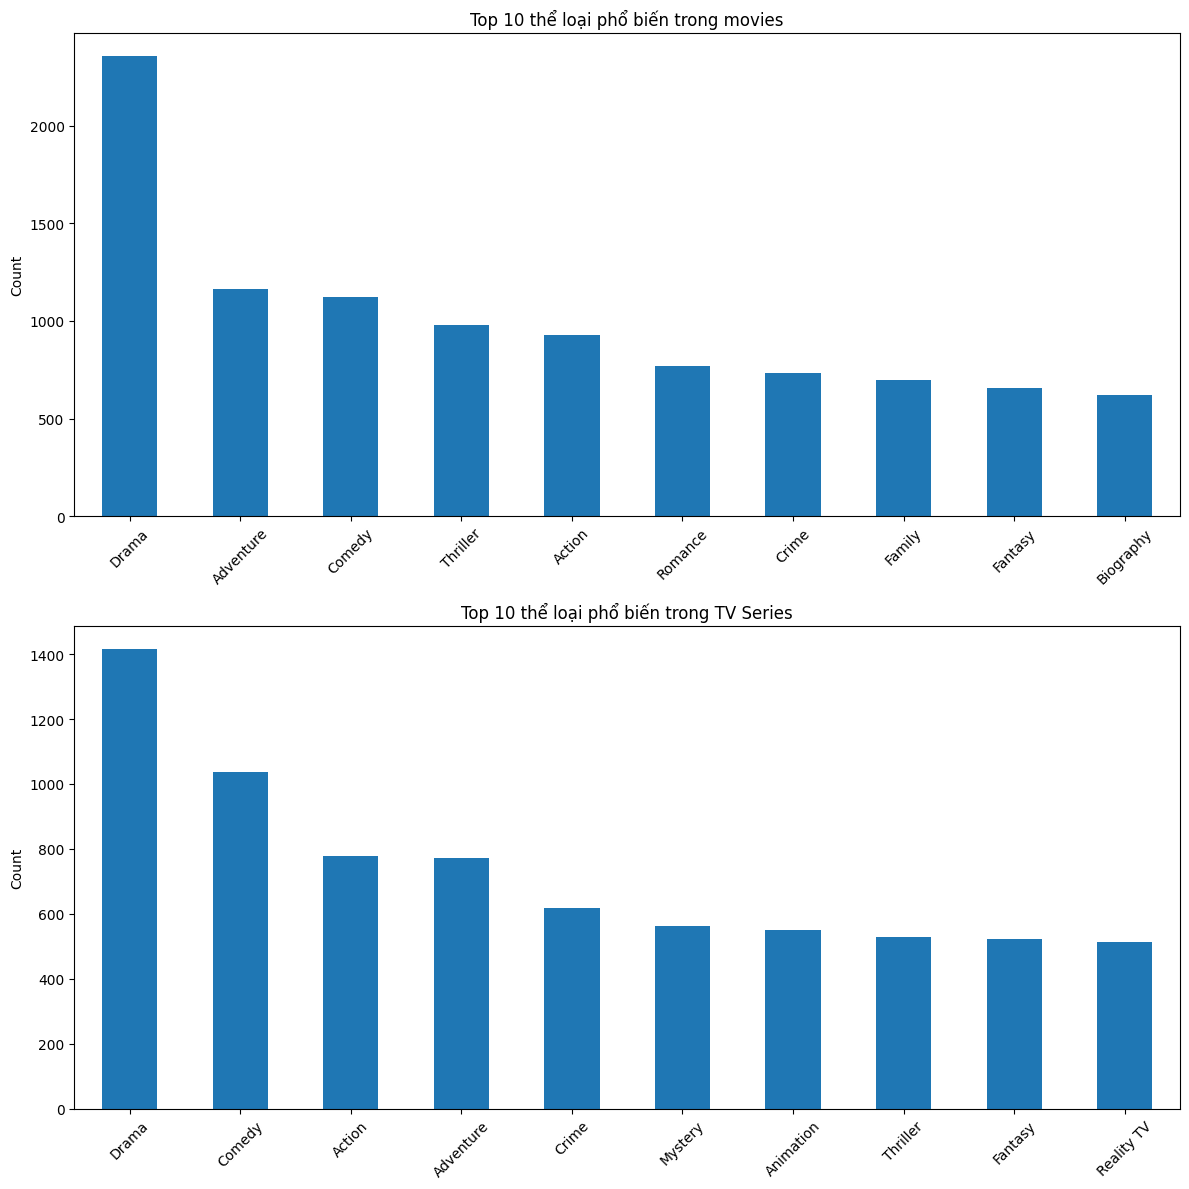


Top 5 genres in Movies:
Drama        2356
Adventure    1164
Comedy       1122
Thriller      978
Action        929
dtype: int64

Top 5 genres in TV Series:
Drama        1416
Comedy       1037
Action        777
Adventure     773
Crime         617
dtype: int64


In [33]:
# T√°ch c·ªôt genres th√†nh list c√°c th·ªÉ lo·∫°i
df['genres_list'] = df['genres'].str.split(',')

# T·∫°o h√†m ƒë·∫øm th·ªÉ lo·∫°i
def count_genres(data):
    genre_counts = {}
    for genres in data['genres_list']:
        if isinstance(genres, list):
            for genre in genres:
                genre = genre.strip()
                genre_counts[genre] = genre_counts.get(genre, 0) + 1
    return pd.Series(genre_counts).sort_values(ascending=False)

# Ph√¢n t√≠ch th·ªÉ lo·∫°i ph·ªï bi·∫øn cho Movies v√† TV Series
movies_genres = count_genres(df[df['type'] == 'Movie'])
tv_genres = count_genres(df[df['type'] == 'TV Series'])

# V·∫Ω bi·ªÉu ƒë·ªì top 10 th·ªÉ lo·∫°i ph·ªï bi·∫øn
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

movies_genres.head(10).plot(kind='bar', ax=ax1)
ax1.set_title('Top 10 th·ªÉ lo·∫°i ph·ªï bi·∫øn trong movies')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

tv_genres.head(10).plot(kind='bar', ax=ax2)
ax2.set_title('Top 10 th·ªÉ lo·∫°i ph·ªï bi·∫øn trong TV Series')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nTop 5 genres in Movies:")
print(movies_genres.head())
print("\nTop 5 genres in TV Series:")
print(tv_genres.head())

T·ª´ ƒë·ªì th·ªã, ta l·ª±a ch·ªçn c√°c th·ªÉ lo·∫°i chi·∫øm s·ªë l∆∞·ª£ng l·ªõn: Drama, adventure, comedy, action, thriller, crime.

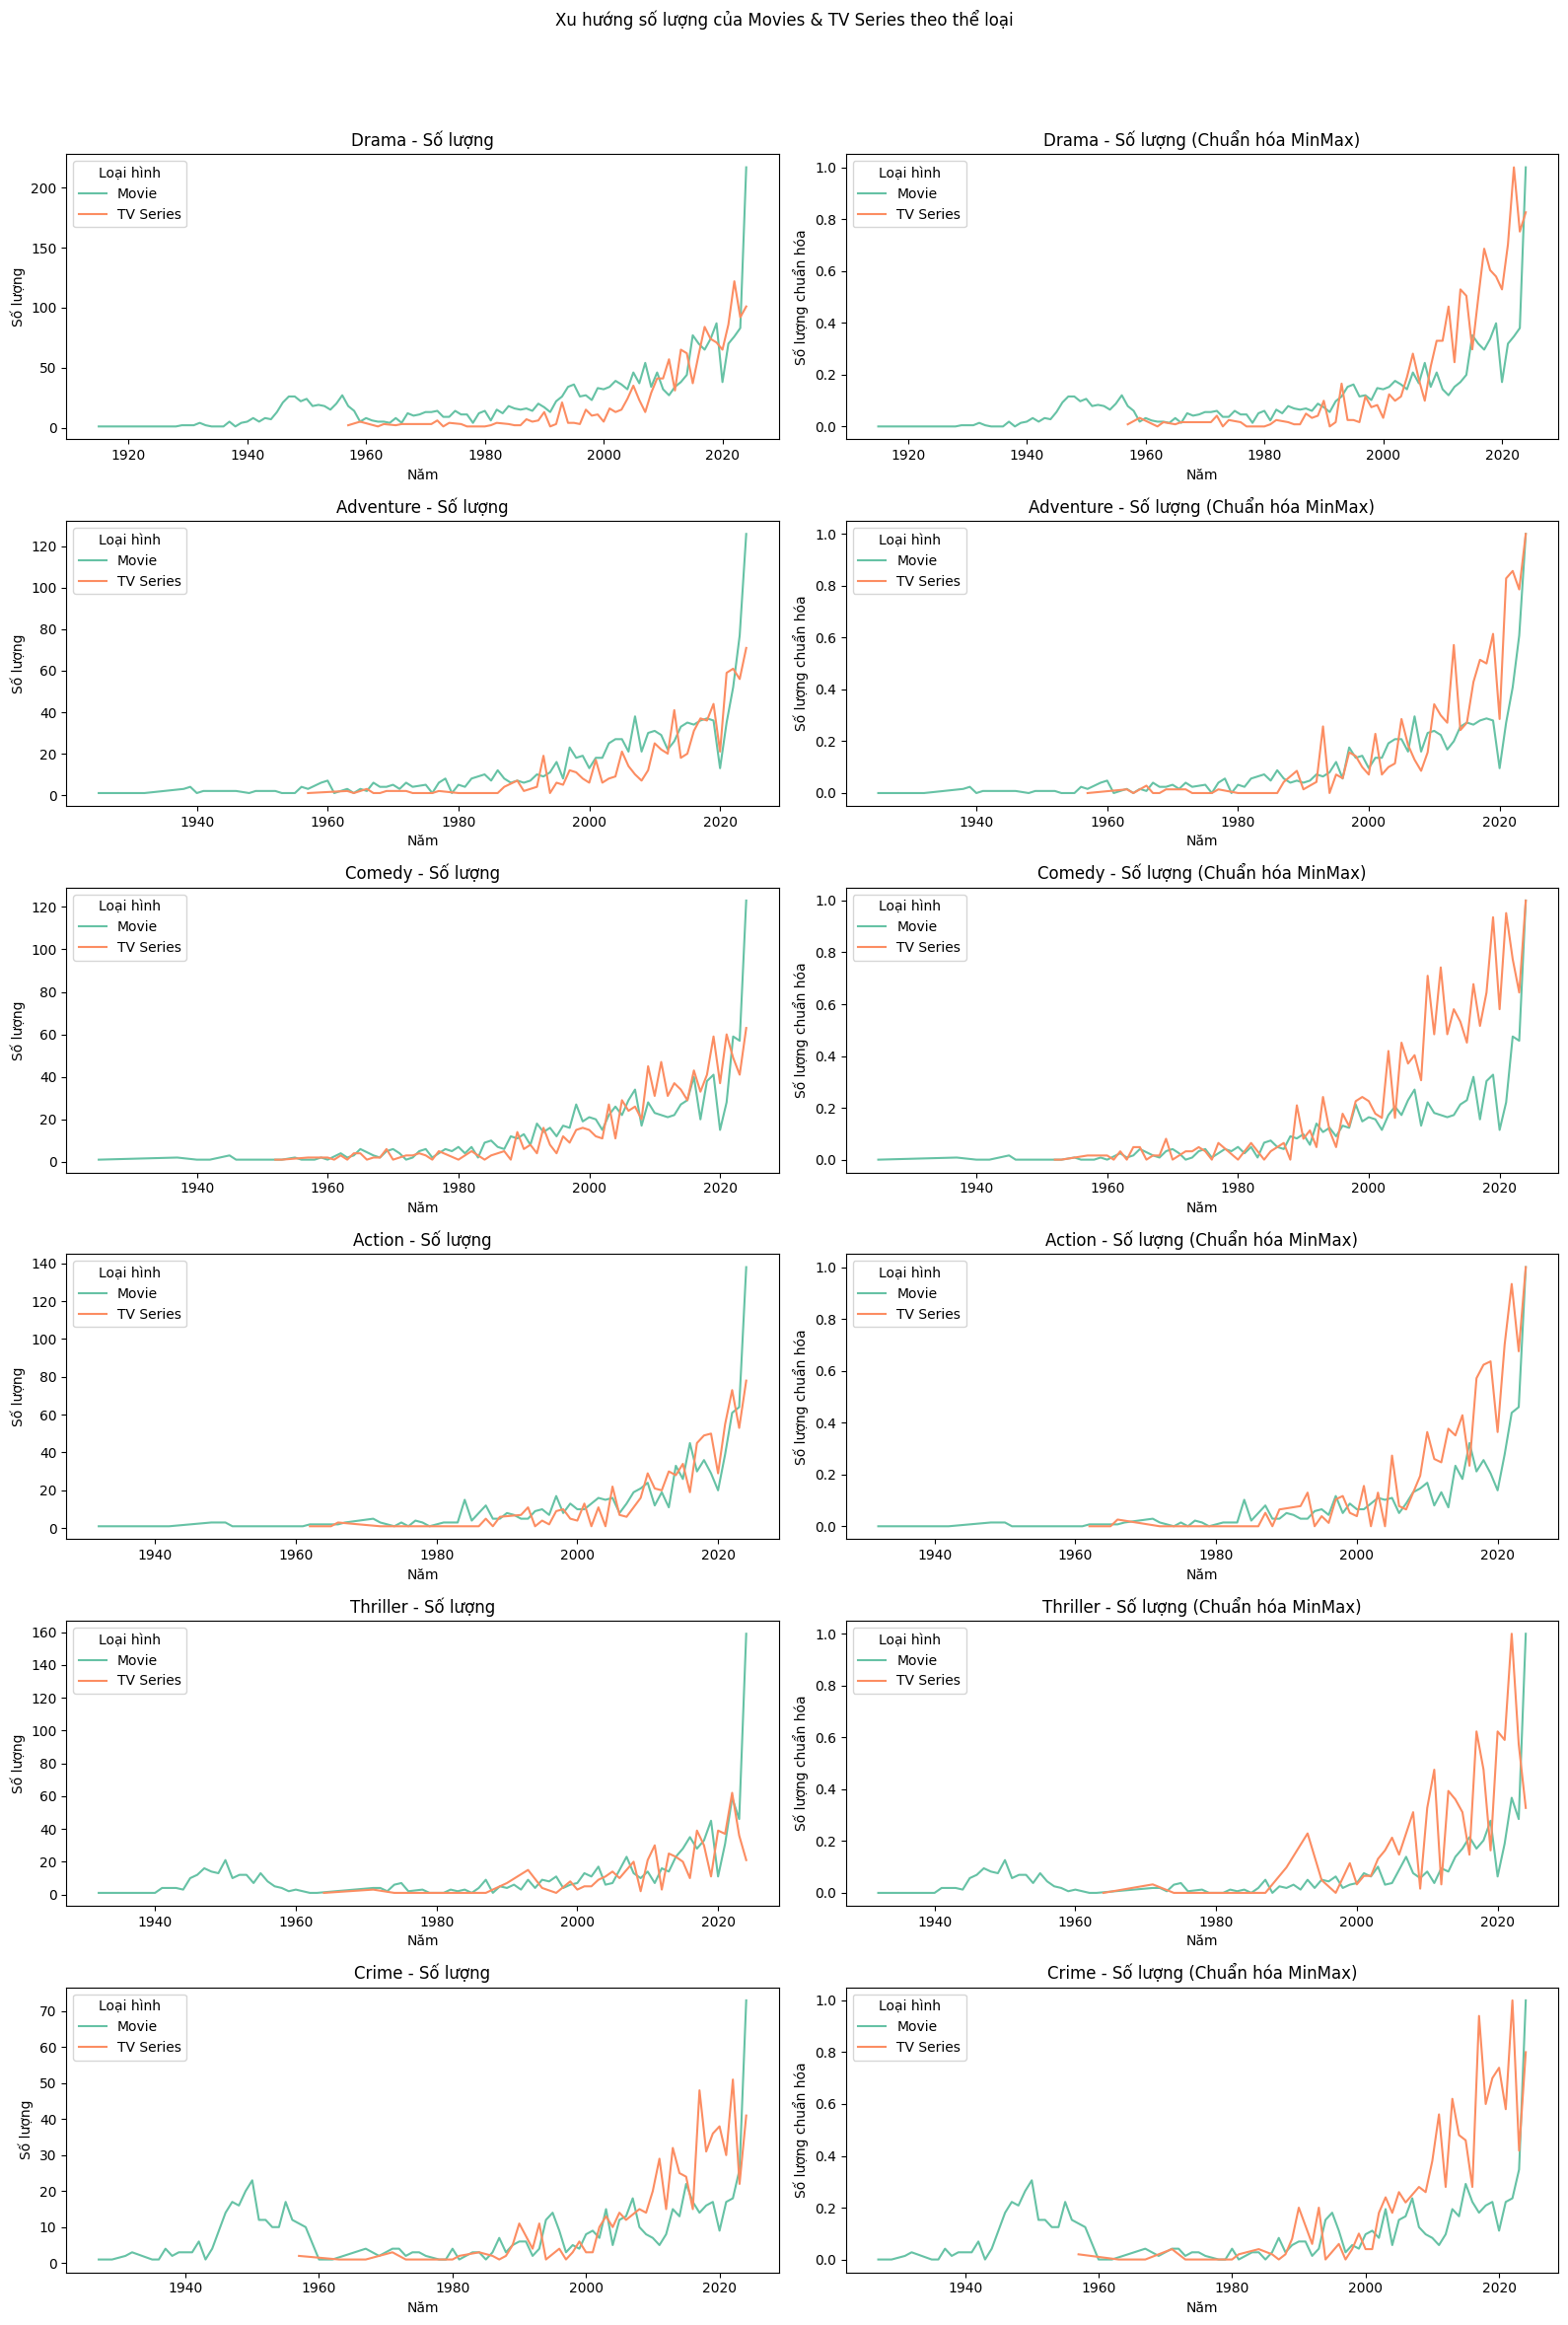

In [50]:
data = df.copy()

# C√°c th·ªÉ lo·∫°i c·∫ßn l·ªçc
selected_genres = ["Drama", "Adventure", "Comedy", "Action", "Thriller", "Crime"]

# Chuy·ªÉn ƒë·ªïi c·ªôt 'genres' th√†nh danh s√°ch th·ªÉ lo·∫°i
data["genres_list"] = data["genres"].apply(lambda x: x.split(", ") if isinstance(x, str) else [])
data.dropna(subset=["release_date"], inplace=True)

# H√†m ki·ªÉm tra n·∫øu m·ªôt b·ªô phim thu·ªôc th·ªÉ lo·∫°i ƒë√£ ch·ªçn
def contains_selected_genre(genre_list):
    return any(genre in genre_list for genre in selected_genres)

# L·ªçc d·ªØ li·ªáu theo c√°c th·ªÉ lo·∫°i ƒë√£ ch·ªçn
filtered_df = data[data["genres_list"].apply(contains_selected_genre)]

# L·ªçc b·ªè c√°c d√≤ng c√≥ gi√° tr·ªã release_date NaN
filtered_df = filtered_df.dropna(subset=["release_date"])
filtered_df["release_date"] = filtered_df["release_date"].astype(int)  # Chuy·ªÉn th√†nh ki·ªÉu s·ªë nguy√™n

# T·∫°o figure v·ªõi layout 6x2
fig, axes = plt.subplots(6, 2, figsize=(16, 24))
fig.suptitle("Xu h∆∞·ªõng s·ªë l∆∞·ª£ng c·ªßa Movies & TV Series theo th·ªÉ lo·∫°i")

for i, genre in enumerate(selected_genres):
    genre_df = filtered_df[filtered_df["genres_list"].apply(lambda x: genre in x)]

    # Xu h∆∞·ªõng s·ªë l∆∞·ª£ng phim theo nƒÉm
    genre_count_trend = genre_df.groupby(["release_date", "type"]).size().reset_index(name="count")
    
    ax = axes[i, 0]
    sns.lineplot(data=genre_count_trend, x="release_date", y="count", hue="type", palette="Set2", ax=ax)
    ax.set_title(f"{genre} - S·ªë l∆∞·ª£ng")
    ax.set_xlabel("NƒÉm")
    ax.set_ylabel("S·ªë l∆∞·ª£ng")
    ax.legend(title="Lo·∫°i h√¨nh")

    # Chu·∫©n h√≥a ri√™ng cho Movies v√† TV Series
    genre_count_trend_movies = genre_count_trend[genre_count_trend["type"] == "Movie"].copy()
    genre_count_trend_tv = genre_count_trend[genre_count_trend["type"] == "TV Series"].copy()
    
    scaler_movies = MinMaxScaler()
    scaler_tv = MinMaxScaler()
    
    if not genre_count_trend_movies.empty:
        genre_count_trend_movies[["count"]] = scaler_movies.fit_transform(genre_count_trend_movies[["count"]])
    if not genre_count_trend_tv.empty:
        genre_count_trend_tv[["count"]] = scaler_tv.fit_transform(genre_count_trend_tv[["count"]])
    
    genre_count_trend_scaled = pd.concat([genre_count_trend_movies, genre_count_trend_tv])
    
    ax = axes[i, 1]
    sns.lineplot(data=genre_count_trend_scaled, x="release_date", y="count", hue="type", palette="Set2", ax=ax)
    ax.set_title(f"{genre} - S·ªë l∆∞·ª£ng (Chu·∫©n h√≥a MinMax)")
    ax.set_xlabel("NƒÉm")
    ax.set_ylabel("S·ªë l∆∞·ª£ng chu·∫©n h√≥a")
    ax.legend(title="Lo·∫°i h√¨nh")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Nh·∫≠n x√©t  ƒë·ªì th·ªã:
1. ·∫¢nh h∆∞·ªüng c·ªßa chu·∫©n h√≥a MinMax:
- Tr∆∞·ªõc khi chu·∫©n h√≥a: cho th·∫•y s·ª± c√°ch bi·ªát v·ªÅ quy m√¥ c·ªßa TV series v√† Movies khi·∫øn cho TV series lu√¥n l√©p v·∫ø so v·ªõi movies.
- Sau khi chu·∫©n h√≥a, c√°c xu h∆∞·ªõng tr·ªü n√™n r√µ r√†ng h∆°n, gi√∫p so s√°nh s·ª± tƒÉng tr∆∞·ªüng gi·ªØa Movies v√† TV Series theo t·ª´ng giai ƒëo·∫°n.
- C√°c ƒë∆∞·ªùng tƒÉng tr∆∞·ªüng c·ªßa TV Series tr·ªü n√™n g·∫ßn h∆°n v·ªõi Movies.
- Qua nƒÉm 2000, TV series c√≥ s·ª± tƒÉng tr∆∞·ªüng m·∫°nh m·∫Ω h∆°n so v·ªõi Movies.
2. S·ª± ph√¢n b·ªë c·ªßa c√°c th·ªÉ lo·∫°i theo TV series v√† movies:
- Drama, Comedy, Action, Thriller: TV Series c√≥ t·ªëc ƒë·ªô tƒÉng tr∆∞·ªüng nhanh h∆°n Movies, ƒë·∫∑c bi·ªát t·ª´ nh·ªØng nƒÉm 2000 tr·ªü ƒëi.
- Adventure, Crime: Movies v·∫´n gi·ªØ v·ªã tr√≠ d·∫´n ƒë·∫ßu, nh∆∞ng TV Series ƒëang d·∫ßn thu h·∫πp kho·∫£ng c√°ch.
3. T√≥m l·∫°i:
- TV Series ƒëang ng√†y c√†ng th·ªëng tr·ªã trong c√°c th·ªÉ lo·∫°i nh∆∞ Drama, Comedy v√† Action.
- Movies v·∫´n gi·ªØ v·ªã tr√≠ quan tr·ªçng trong c√°c th·ªÉ lo·∫°i Adventure v√† Crime.
- S·ª± ph√°t tri·ªÉn m·∫°nh m·∫Ω c·ªßa n·ªÅn t·∫£ng streaming nh∆∞ Netflix, Disney+, HBO Max c√≥ th·ªÉ l√† nguy√™n nh√¢n ch√≠nh cho xu h∆∞·ªõng tƒÉng c·ªßa TV Series.

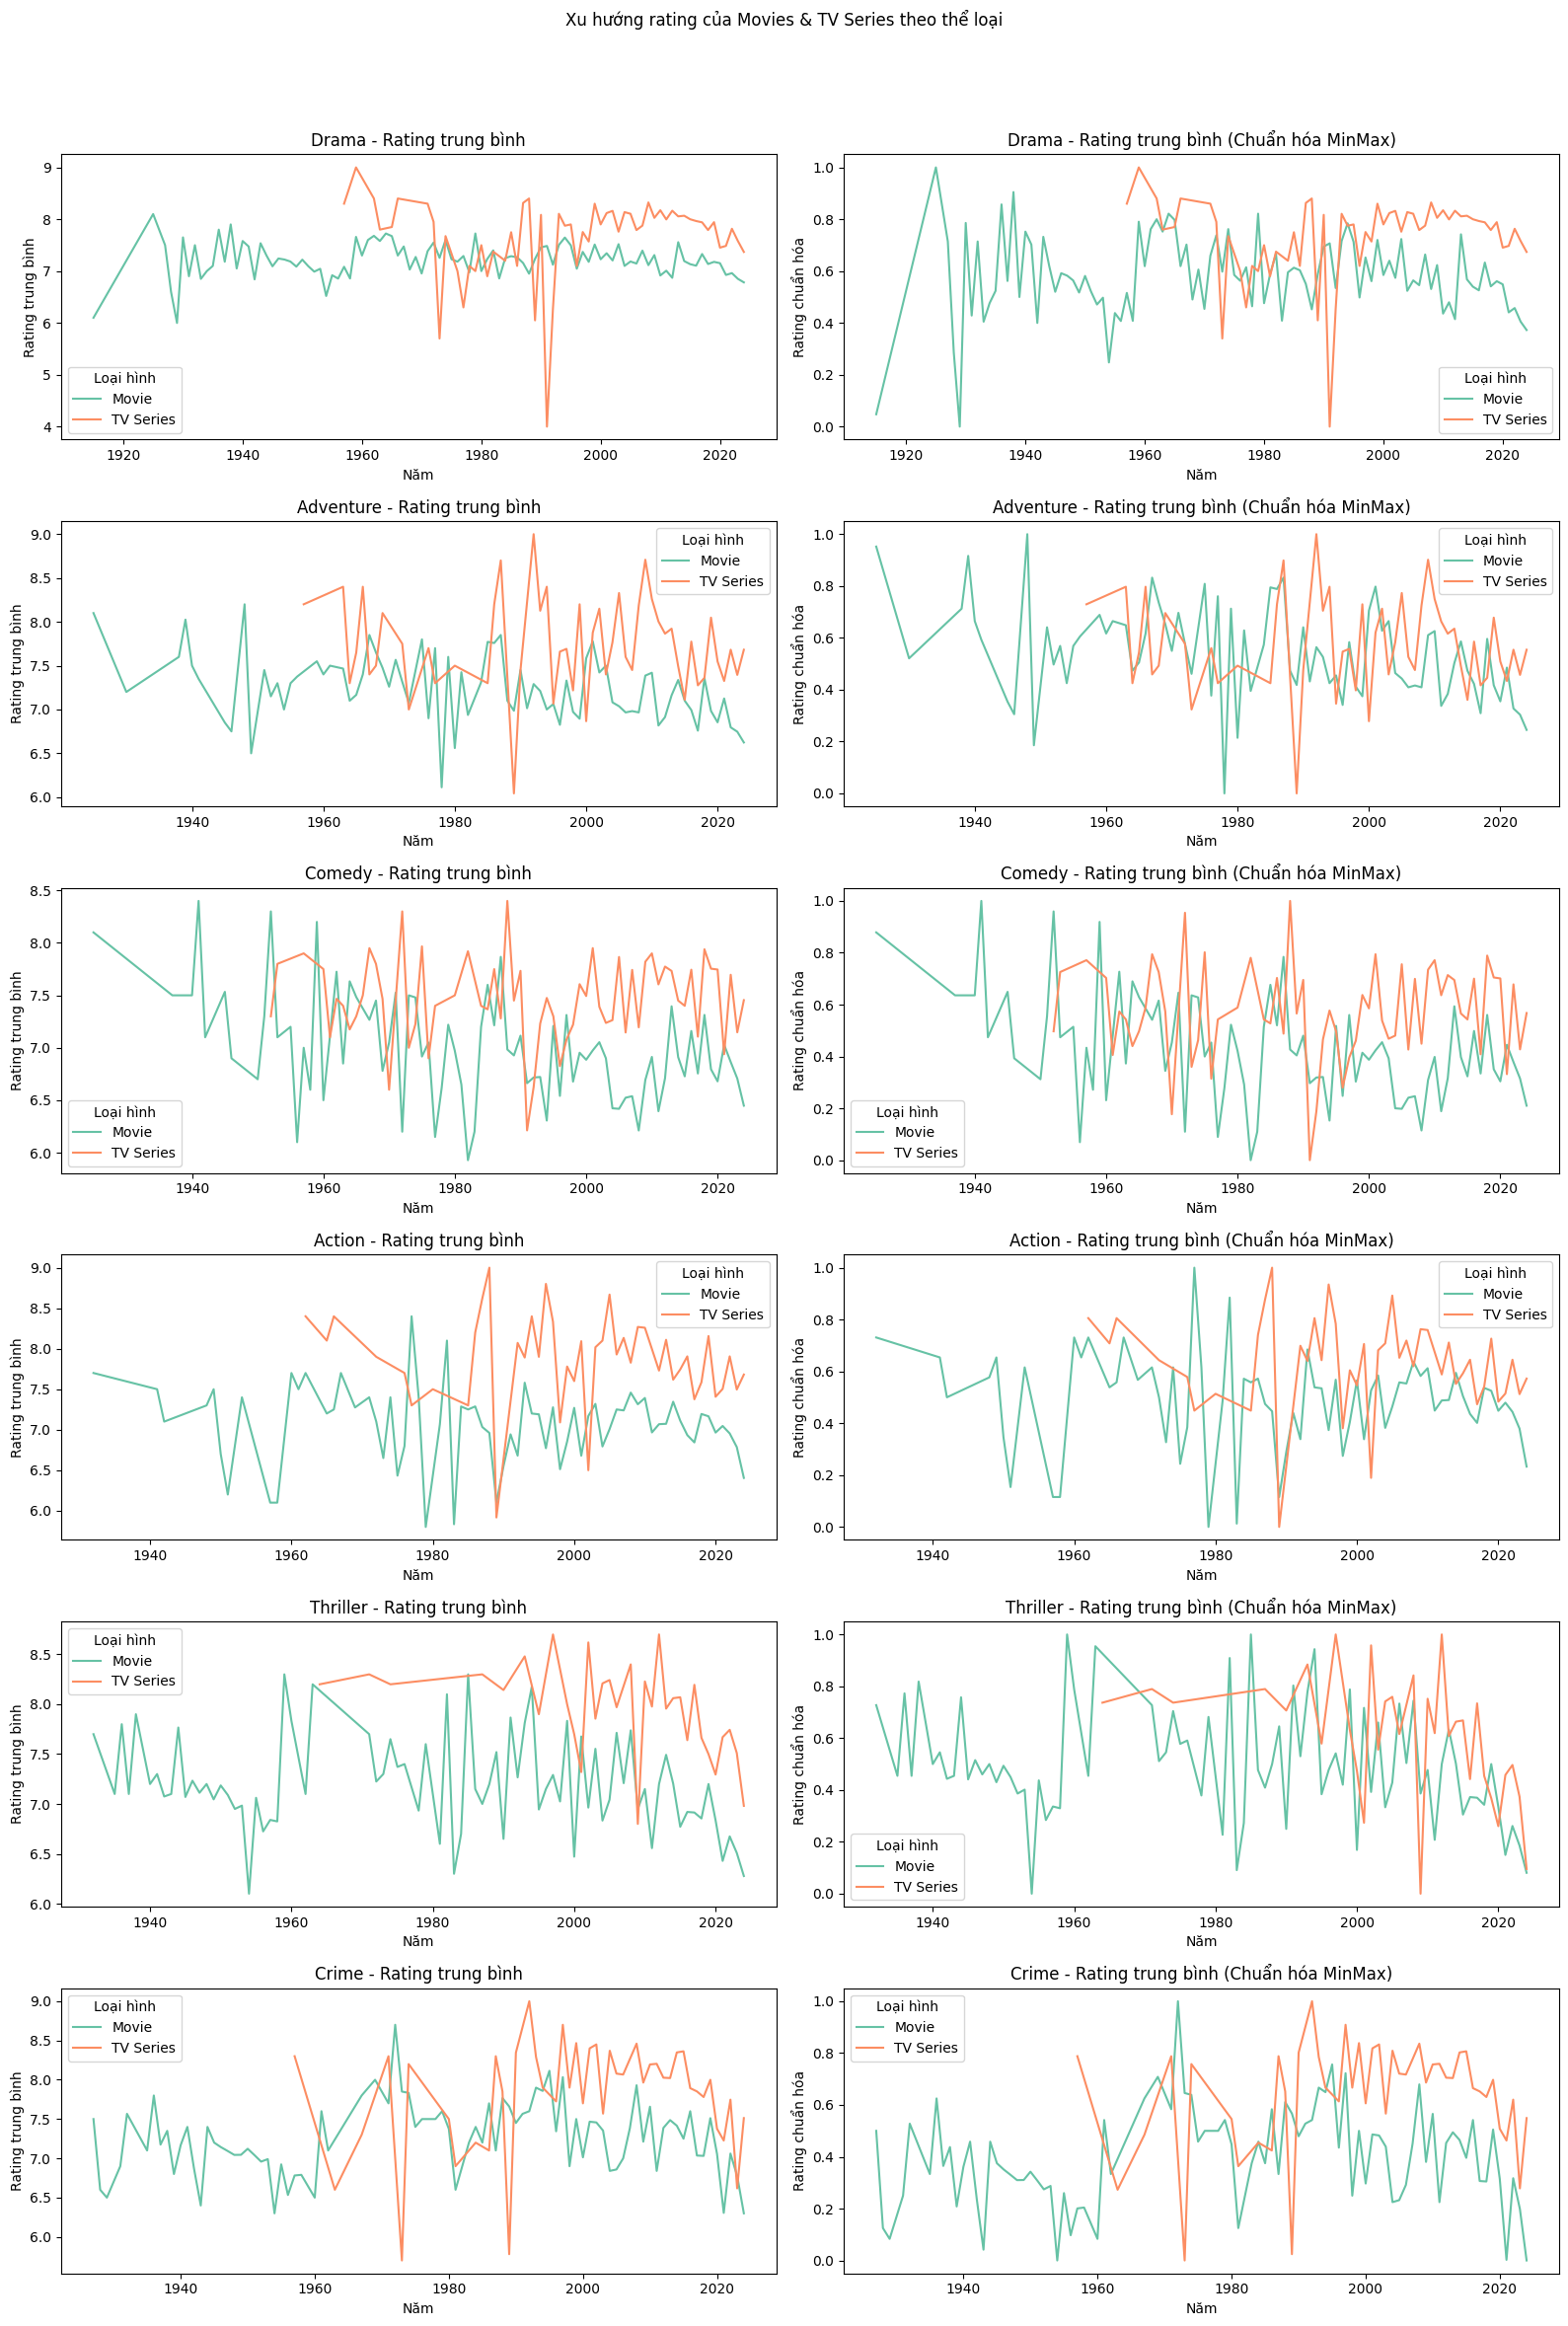

In [55]:
# T·∫°o figure v·ªõi layout 6x2
fig, axes = plt.subplots(6, 2, figsize=(16, 24))
fig.suptitle("Xu h∆∞·ªõng rating c·ªßa Movies & TV Series theo th·ªÉ lo·∫°i")

for i, genre in enumerate(selected_genres):
    genre_df = filtered_df[filtered_df["genres_list"].apply(lambda x: genre in x)]

    # Xu h∆∞·ªõng rating trung b√¨nh theo nƒÉm
    genre_rating_trend = genre_df.groupby(["release_date", "type"])["rating"].mean().reset_index()
    
    ax = axes[i, 0]
    sns.lineplot(data=genre_rating_trend, x="release_date", y="rating", hue="type", palette="Set2", ax=ax)
    ax.set_title(f"{genre} - Rating trung b√¨nh")
    ax.set_xlabel("NƒÉm")
    ax.set_ylabel("Rating trung b√¨nh")
    ax.legend(title="Lo·∫°i h√¨nh")

    # Chu·∫©n h√≥a ri√™ng cho Movies v√† TV Series
    genre_rating_trend_movies = genre_rating_trend[genre_rating_trend["type"] == "Movie"].copy()
    genre_rating_trend_tv = genre_rating_trend[genre_rating_trend["type"] == "TV Series"].copy()
    
    scaler_movies = MinMaxScaler()
    scaler_tv = MinMaxScaler()
    
    if not genre_rating_trend_movies.empty:
        genre_rating_trend_movies[["rating"]] = scaler_movies.fit_transform(genre_rating_trend_movies[["rating"]])
    if not genre_rating_trend_tv.empty:
        genre_rating_trend_tv[["rating"]] = scaler_tv.fit_transform(genre_rating_trend_tv[["rating"]])
    
    genre_rating_trend_scaled = pd.concat([genre_rating_trend_movies, genre_rating_trend_tv])
    
    ax = axes[i, 1]
    sns.lineplot(data=genre_rating_trend_scaled, x="release_date", y="rating", hue="type", palette="Set2", ax=ax)
    ax.set_title(f"{genre} - Rating trung b√¨nh (Chu·∫©n h√≥a MinMax)")
    ax.set_xlabel("NƒÉm")
    ax.set_ylabel("Rating chu·∫©n h√≥a")
    ax.legend(title="Lo·∫°i h√¨nh")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Nh·∫≠n x√©t  ƒë·ªì th·ªã:
1. ·∫¢nh h∆∞·ªüng c·ªßa chu·∫©n h√≥a MinMax
- Tr∆∞·ªõc khi chu·∫©n h√≥a:

    Rating c·ªßa Movies v√† TV Series c√≥ s·ª± kh√°c bi·ªát ƒë√°ng k·ªÉ, ƒë·∫∑c bi·ªát TV Series th∆∞·ªùng c√≥ s·ª± dao ƒë·ªông √≠t h∆°n so v·ªõi Movies.<br>
    M·ªôt s·ªë giai ƒëo·∫°n c√≥ s·ª± ch√™nh l·ªách l·ªõn gi·ªØa hai lo·∫°i h√¨nh.<br>
- Sau khi chu·∫©n h√≥a:

    Xu h∆∞·ªõng rating c·ªßa Movies v√† TV Series ko c√≥ s·ª± kh√°c bi·ªát nhi·ªÅu.<br
    TV Series c√≥ s·ª± ·ªïn ƒë·ªãnh h∆°n so v·ªõi Movies trong m·ªôt s·ªë th·ªÉ lo·∫°i.<br
2. Xu h∆∞·ªõng rating theo t·ª´ng th·ªÉ lo·∫°i
- Drama, Comedy, Action, Thriller:
    TV Series th∆∞·ªùng c√≥ rating ·ªïn ƒë·ªãnh v√† cao h∆°n Movies trong nh·ªØng nƒÉm g·∫ßn ƒë√¢y.<br>
    ƒê·∫∑c bi·ªát t·ª´ sau 2000, TV Series c√≥ xu h∆∞·ªõng tƒÉng nh·∫π v·ªÅ rating so v·ªõi Movies.<br
- Adventure, Crime:

    Rating c·ªßa Movies v·∫´n cao v√† ·ªïn ƒë·ªãnh h∆°n so v·ªõi TV Series trong ph·∫ßn l·ªõn th·ªùi gian.<br>
    Tuy nhi√™n, TV Series ƒëang c√≥ xu h∆∞·ªõng ti·ªám c·∫≠n v·ªõi Movies ·ªü nh·ªØng nƒÉm g·∫ßn ƒë√¢y.<br
3. T√≥m l·∫°i
- Movies c√≥ rating dao ƒë·ªông m·∫°nh h∆°n, th·ªÉ hi·ªán r√µ r·ªát h∆°n ·ªü c√°c giai ƒëo·∫°n tr∆∞·ªõc nƒÉm 2000.
- TV Series c√≥ rating ·ªïn ƒë·ªãnh v√† c√≥ xu h∆∞·ªõng tƒÉng d·∫ßn trong nhi·ªÅu th·ªÉ lo·∫°i.
- S·ª± ph√°t tri·ªÉn c·ªßa streaming platforms (Netflix, Disney+, HBO Max, Amazon Prime,...) ƒë√£ th√∫c ƒë·∫©y s·ª± c·∫£i thi·ªán ch·∫•t l∆∞·ª£ng c·ªßa TV Series, gi√∫p duy tr√¨ m·ª©c rating cao v√† ·ªïn ƒë·ªãnh h∆°n.

### K·∫øt lu·∫≠n & D·ª± ƒëo√°n T∆∞∆°ng Lai
1. K·∫øt lu·∫≠n t·ª´ d·ªØ li·ªáu hi·ªán t·∫°i
- S·ªë l∆∞·ª£ng TV Series ƒëang gia tƒÉng m·∫°nh m·∫Ω, ƒë·∫∑c bi·ªát t·ª´ sau nƒÉm 2000, cho th·∫•y xu h∆∞·ªõng d·ªãch chuy·ªÉn t·ª´ phim ƒëi·ªán ·∫£nh sang n·ªôi dung truy·ªÅn h√¨nh d√†i t·∫≠p.
- Movies v·∫´n duy tr√¨ v·ªã th·∫ø quan tr·ªçng, ƒë·∫∑c bi·ªát ·ªü c√°c th·ªÉ lo·∫°i nh∆∞ Adventure v√† Crime, nh∆∞ng t·ªëc ƒë·ªô tƒÉng tr∆∞·ªüng v·ªÅ s·ªë l∆∞·ª£ng ch·∫≠m h∆°n so v·ªõi TV Series.
- TV Series c√≥ xu h∆∞·ªõng ƒë·∫°t rating cao v√† ·ªïn ƒë·ªãnh h∆°n so v·ªõi Movies, ph·∫£n √°nh s·ª± ƒë·∫ßu t∆∞ ch·∫•t l∆∞·ª£ng n·ªôi dung t·ªët h∆°n, ƒë·∫∑c bi·ªát nh·ªù s·ª± ph√°t tri·ªÉn c·ªßa c√°c n·ªÅn t·∫£ng streaming.
- Th·ªÉ lo·∫°i Drama, Comedy, Action v√† Thriller l√† nh·ªØng lƒ©nh v·ª±c m√† TV Series ƒëang c√≥ t·ªëc ƒë·ªô ph√°t tri·ªÉn t·ªët h∆°nh∆°n.
2Ô∏è. D·ª± ƒëo√°n t∆∞∆°ng lai
- TV Series s·∫Ω ti·∫øp t·ª•c ph√°t tri·ªÉn m·∫°nh, nh·ªù s·ª± b√πng n·ªï c·ªßa n·ªÅn t·∫£ng streaming nh∆∞ Netflix, Disney+, HBO Max, Amazon Prime,...
- S·ªë l∆∞·ª£ng ph√°t h√†nh c·ªßa Movies ƒëang tƒÉng m·∫°nh nh·ªù s·ª± ph√°t tri·ªÉn c√¥ng ngh·ªá nh∆∞ng TV series s·∫Ω d·∫ßn ƒëu·ªïi k·ªãp v√† ƒë∆∞·ª£c ∆∞a chu·ªông h∆°n nh·ªù ch·∫•t l∆∞·ª£ng t·ªët.
- S·ª± k·∫øt h·ª£p gi·ªØa TV Series & Movies s·∫Ω ph·ªï bi·∫øn h∆°n (V√≠ d·ª•: TV Series m·ªü r·ªông v≈© tr·ª• ƒëi·ªán ·∫£nh nh∆∞ Marvel, Star Wars, The Witcher, Dune,...) ƒë·ªÉ t·∫≠n d·ª•ng s·ª©c m·∫°nh c·ªßa c·∫£ hai lo·∫°i h√¨nh.
- M·ªôt s·ªë th·ªÉ lo·∫°i nh∆∞ Adventure & Crime c√≥ th·ªÉ ch·ª©ng ki·∫øn s·ª± tr·ªói d·∫≠y c·ªßa TV Series, thu h·∫πp kho·∫£ng c√°ch v·ªõi Movies trong t∆∞∆°ng lai g·∫ßn.